In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure, show

df= pd.read_csv('indian_food.csv',encoding='latin-1')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


C:\Users\chuntika\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



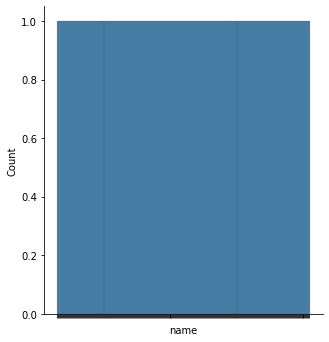

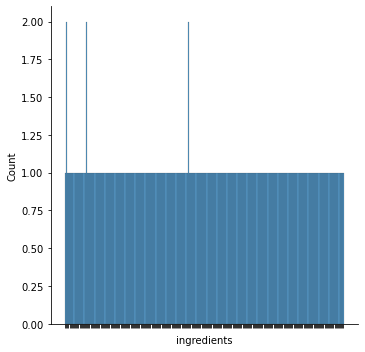

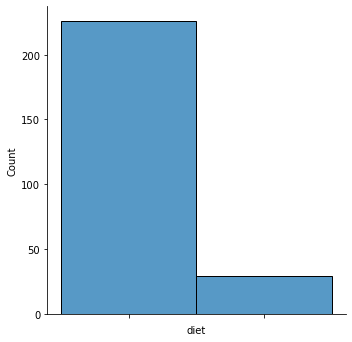

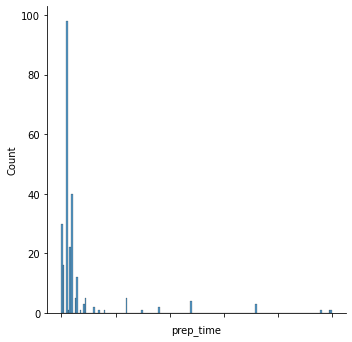

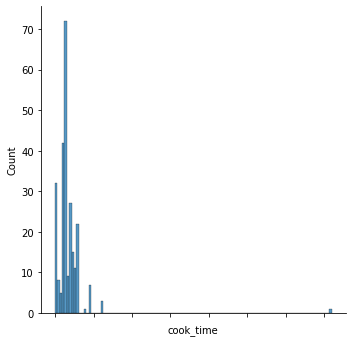

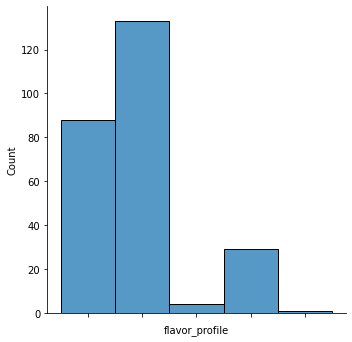

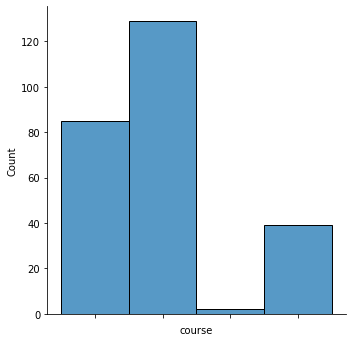

In [2]:
for i in range(0, 7):
    sns.displot(data=df,x=df.columns[i] ).set(xticklabels=[])

In [4]:
pd.get_dummies(df['ingredients'], prefix='ingredients')

,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup","ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli","ingredients_Arhar dal, coconut oil, curry leaves, mustard seeds, red chilli","ingredients_Arhar dal, sambar powder, tomato, curry leaves, fennel seeds","ingredients_Baby corn, french beans, garam masala, ginger, carrot","ingredients_Baby potatoes, garam masala, cashew nuts, kasuri methi, tomatoes","ingredients_Baingan, fish, coconut oil, fresh coconut, ginger",...,"ingredients_Whole wheat flour, low fat, bengal gram flour","ingredients_Whole wheat flour, musk melon seeds, poppy seeds, edible gum, semolina","ingredients_Whole wheat flour, olive oil, hot water, all purpose flour","ingredients_Whole wheat flour, rice flour, pearl millet flour, sorghum flour, sesame seeds","ingredients_Whole wheat rava, chia seed, lemon, edible gum, litre milk","ingredients_Yoghurt, refined flour, ghee, fennel seeds","ingredients_Yogurt, besan, sauce, garam masala powder, gram flour","ingredients_Yogurt, fresh coconut, sesame seeds, semolina, gram flour","ingredients_Yogurt, ginger, curry leaves, baking soda, green chilli","ingredients_Yogurt, milk, nuts, sugar"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['ingredients'] = list(df['ingredients'].str.split(','))

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('ingredients')),
                index=df.index,
                columns=mlb.classes_))


In [7]:
df.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region,jaggery,Dharwadi buffalo milk,...,Tea leaves,Thin rice flakes,Tomato,Urad dal,Vermicelli pudding,Wheat flour,Whole wheat flour,Whole wheat rava,Yoghurt,Yogurt
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data1 = df
data1.groupby('course').size()


course
dessert         85
main course    129
snack           39
starter          2
dtype: int64

In [9]:
data1
data1 = data1.groupby('course').filter(lambda x : len(x)>5)
cn = set(data1['course']) 


In [10]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
#from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
data1 = data1.loc[data1['course'] != str(-1)] #Let's remove that -1 state value
train, test = train_test_split(data1, test_size = 0.6, stratify = data1['course'], random_state =42 )


In [11]:
features = list(data1.columns)
features.remove('state')
features.remove('region')
features.remove('name')
features.remove('course')
features.remove('flavor_profile')
features.remove('diet')
features.remove('prep_time')
features.remove('cook_time')
print(features)


['  jaggery', ' Dharwadi buffalo milk', ' Sugar', ' all purpose flour', ' almond', ' almonds', ' aloo', ' alum powder', ' amchur powder', ' arhar dal', ' arrowroot powder', ' atta', ' avocado oil', ' axone', ' baby potatoes', ' badam', ' baking powder', ' baking soda', ' banana', ' basmati rice', ' bay leaf', ' beans', ' beetroot', ' bell pepper', ' bell peppers', ' bengal gram flour', ' besan', ' bhatura', ' bhuna chana', ' biryani masala powder', ' bitter gourd', ' black pepper', ' black salt', ' black sesame seeds', ' blend rice', ' boiled potatoes', ' bombay rava', ' boondi', ' bread crumbs', ' brinjal', ' butter', ' cabbage', ' capsicum', ' cardamom', ' cardamom pods', ' cardamom powder', ' carrot', ' cashew nuts', ' cashews', ' cashews and raisins', ' chana daal', ' chana dal', ' chenna cheese', ' chia seed', ' chicken', ' chicken chunks', ' chickpea flour', ' chickpeas', ' chili powder', ' chilli', ' chillies', ' chopped tomatoes', ' cilantro', ' cinnamon', ' cinnamon stick', ' 

In [16]:
X_train = train[features] #Training features
y_train = train.course #Training classifiers
X_test = test[features] 
y_test = test.course 
mod_dt = DecisionTreeClassifier(max_depth = 9, random_state = 1) 

mod_dt.fit(X_train,y_train) 
prediction=mod_dt.predict(X_test) 
print('The accuracy of the Decision Tree is','{:.3f}'.format(metrics.accuracy_score(prediction,y_test))) 


The accuracy of the Decision Tree is 0.625


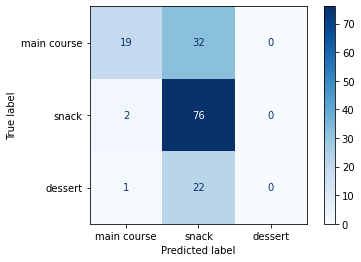

In [17]:
cn = list(set(data1['course']))
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,display_labels=cn,cmap=plt.cm.Blues,normalize=None)


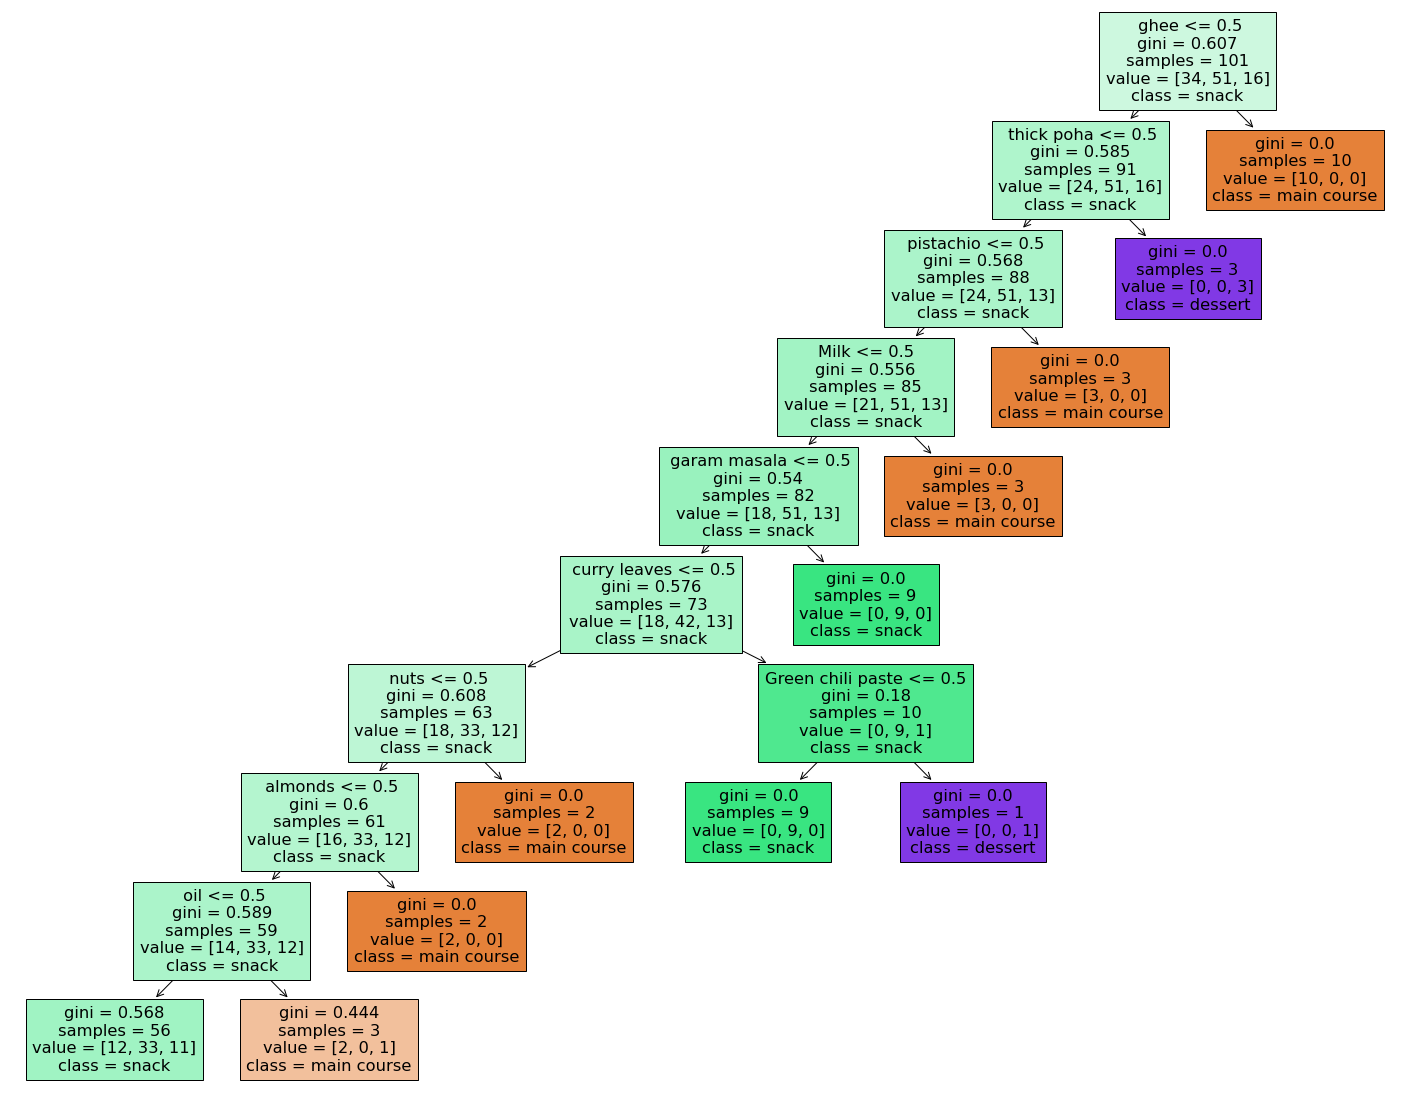

In [18]:
fn = list(features)

fig = plt.figure(figsize=(25,20))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True)
plt.savefig('foo.pdf')

In [39]:
# data1 =data1.loc[data1['name'] != 'Panjeeri' ] #cutting out an odd null value
# data1['region'].isnull().values.any() ##Checks for other nulls


# ##region
# train, test = train_test_split(data1, test_size = 0.4, stratify = data1['region'], random_state = 42)
# X_train = train[features]
# y_train = train.region
# X_test = test[features]
# y_test = test.region
# mod_dt = DecisionTreeClassifier(max_depth =5, random_state = 1)
# mod_dt.fit(X_train,y_train)
# prediction=mod_dt.predict(X_test)
# print('The accuracy of the Decision Tree is','{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))


The accuracy of the Decision Tree is 0.396
